This notebook will help you get started solving the given problem. In this challenge, we have to predict the attack type. 

In [246]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import gc
from ggplot import *

In [247]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [248]:
print('The train data has {} rows and {} columns'.format(train.shape[0], train.shape[1]))
print('The test data has {} rows and {} columns'.format(test.shape[0], test.shape[1]))

The train data has 169307 rows and 43 columns
The test data has 91166 rows and 42 columns


In [249]:
## check target class
train['target'].value_counts(normalize=True)

0    0.583957
2    0.217676
1    0.198367
Name: target, dtype: float64

In [250]:
target = train['target']

In [251]:
def get_features(tmp):
    return [x for x in tmp.columns if x not in ['connection_id','target']]

def free():
    return gc.collect()

def plot_(tmp,an=True):
    plt.figure(figsize=(15,10))
    sns.heatmap(data=tmp.corr(),annot=an)
    plt.show()

There aren't any missing values. Let's jump to building models to get some baseline score.

In [252]:
# chart = ggplot( train, aes(x='pca0', y='pca1', color='target') ) \
#         + geom_point(size=75,alpha=1) \
#         + ggtitle("First and Second Principal Components colored by target")

In [253]:
# chart

In [254]:
print(train.shape)

(169307, 43)


In [255]:
# from sklearn.manifold import TSNE

In [256]:
# tsne = TSNE(n_components=2, verbose=False, perplexity=40, n_iter=300)
# tsne_results = tsne.fit_transform(train[get_features(train)])

In [257]:
# tsne_results_ts=tsne.transform(test[get_features(test)])

In [258]:
# tsne_results

In [259]:
# tsne_results=pd.DataFrame(tsne_results,columns=['tsne0','tsne1'])

In [260]:
# chart = ggplot( train, aes(x='tsne0', y='tsne1', color='target') ) \
#         + geom_point(size=75,alpha=1) \
#         + ggtitle("First and Second Principal Components colored by target")

In [261]:
# chart

# Preprocessing after Visualization

In [262]:
for i in ['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19']:
    print(i,'  ',len(train[i][train[i]!=0]))

cat_4    2
cat_5    42
cat_6    1
cat_7    335
cat_8    18
cat_10    131
cat_11    17
cat_12    4
cat_13    173
cat_14    83
cat_15    12
cat_16    164
cat_17    0
cat_18    1
cat_19    147


In [263]:
#Drop 'cat_4','cat_5','cat_6','cat_7','cat_8','cat_11','cat_12','cat_15','cat_17','cat_18' columns
train=train.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)
test=test.drop(['cat_4','cat_5','cat_6','cat_7','cat_8','cat_10','cat_11','cat_12','cat_13','cat_14','cat_15','cat_16','cat_17','cat_18','cat_19'],1)

CAT_10 And CAT_13 Analysis

Analyze cont_17, cont_18  , we have found that its transformation to mean of both only correlates with cont_6 and cont_7
So, we will go with accepting this instead cont_6,cont_7 problem

In [264]:
free()

11923

In [265]:
train['cont_17_18_mean']=[(i+j)/2 for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_mean']=[(i+j)/2 for i,j in zip(test['cont_17'],test['cont_18'])]

train['cont_17_18_min']=[min(i,j) for i,j in zip(train['cont_17'],train['cont_18'])]
test['cont_17_18_min']=[min(i,j) for i,j in zip(test['cont_17'],test['cont_18'])]

# plt.figure(figsize=(15,10))
# sns.heatmap(data=train.corr(),annot=False)
# plt.show()

print(train[['cont_17_18_min','cont_17_18_mean','target']].corr())

#Try Keeping both min and min coulmn still both are correalted

train=train.drop(['cont_17','cont_18'],1)
test=test.drop(['cont_17','cont_18'],1)

                 cont_17_18_min  cont_17_18_mean    target
cont_17_18_min         1.000000         0.996754 -0.003298
cont_17_18_mean        0.996754         1.000000 -0.001513
target                -0.003298        -0.001513  1.000000


#Analyzing cont_6 and cont_7 

In [266]:
train['cont_4_5_max']=[max(i,j) for i,j in zip(train['cont_4'],train['cont_5'])]
train['cont_6_7_min']=[min(i,j) for i,j in zip(train['cont_6'],train['cont_7'])]
train['cont_15_16_min']=[min(i,j) for i,j in zip(train['cont_15'],train['cont_16'])]
train['cont_15_16_min']=train['cont_14']*2 + np.exp(train['cont_15_16_min'])

test['cont_4_5_max']=[max(i,j) for i,j in zip(test['cont_4'],test['cont_5'])]
test['cont_6_7_min']=[min(i,j) for i,j in zip(test['cont_6'],test['cont_7'])]
test['cont_15_16_min']=[min(i,j) for i,j in zip(test['cont_15'],test['cont_16'])]
test['cont_15_16_min']=test['cont_14']*2 + np.exp(test['cont_15_16_min'])

Experiment

In [208]:
#choose min due to high corr
train=train.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)
test=test.drop(['cont_15','cont_16','cont_4','cont_5','cont_6','cont_7'],1)

In [267]:
print(train.shape,test.shape)

(169307, 31) (91166, 30)


In [210]:
train=train.drop(['cont_17_18_min'],1)
test=test.drop(['cont_17_18_min'],1)

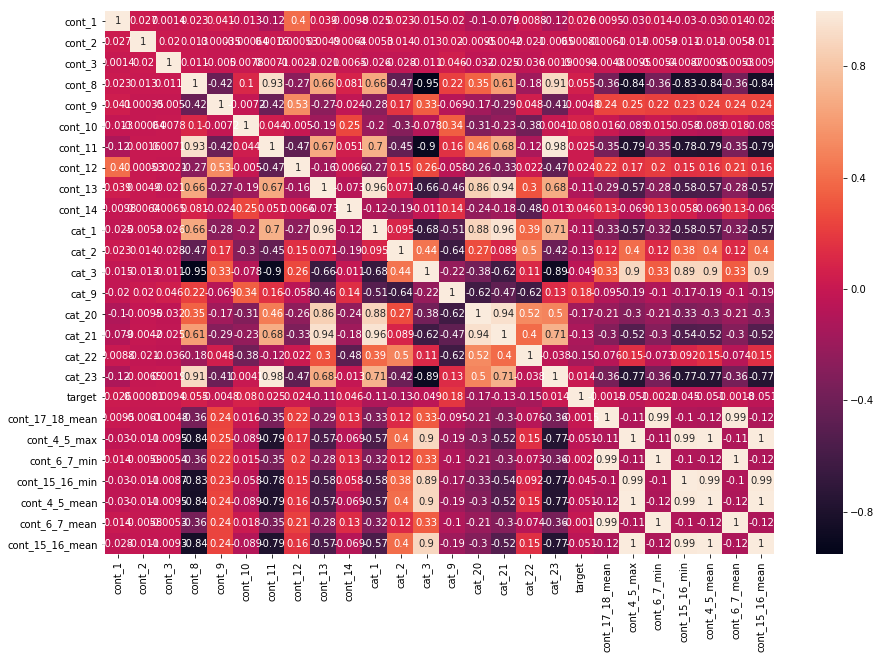

In [211]:
plot_(train)

In [212]:
print(train.shape,test.shape,train.columns,test.columns)

(169307, 27) (91166, 26) Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'target',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'cont_4_5_mean', 'cont_6_7_mean', 'cont_15_16_mean'],
      dtype='object') Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min',
       'cont_4_5_mean', 'cont_6_7_mean', 'cont_15_16_mean'],
      dtype='object')


In [213]:
free()

80411

In [214]:
# temp_tr=pd.DataFrame()
# temp_ts=pd.DataFrame()

# print(temp_tr.shape,temp_ts.shape)

# for i in get_features(train):
#     if 'cat' in i and max(train[i])<100:
#         ohe.fit(np.array(pd.concat([train[i],test[i]],0)).reshape(-1,1))
#         x,y=temp_tr.shape
#         if x==0 and y==0:
#             temp2=ohe.transform(np.array(train[i]).reshape(-1,1)).toarray()
#             print(i,ohe.n_values_,temp2.shape,'--')
#             temp2=pd.DataFrame(data=temp2)
#             for j in temp2.columns:
#                 temp2=temp2.rename(columns={j:'new_'+i+str(j)})
#             temp_tr=pd.DataFrame(data=temp2)
#             temp2=ohe.transform(np.array(test[i]).reshape(-1,1)).toarray()
#             print(ohe.n_values_,temp2.shape,'--')
#             temp2=pd.DataFrame(data=temp2)
#             for j in temp2.columns:
#                 temp2=temp2.rename(columns={j:'new_'+i+str(j)})
#             temp_ts=pd.DataFrame(data=temp2)
#             free()
#             continue        
#         temp2=ohe.transform(np.array(train[i]).reshape(-1,1)).toarray()
#         print(i,ohe.n_values_,temp2.shape,'--')
#         temp2=pd.DataFrame(data=temp2)
#         for j in temp2.columns:
#                 temp2=temp2.rename(columns={j:'new_'+i+str(j)})
#         temp_tr=pd.concat([temp_tr,temp2],1)
#         temp2=ohe.transform(np.array(test[i]).reshape(-1,1)).toarray()
#         print(ohe.n_values_,temp2.shape,'--')
#         temp2=pd.DataFrame(data=temp2)
#         for j in temp2.columns:
#                 temp2=temp2.rename(columns={j:'new_'+i+str(j)})
#         temp_ts=pd.concat([temp_ts,temp2],1)
#         free()
#         print(temp_tr.shape,'  ',temp_ts.shape)

In [215]:
# train=train.drop(['cat_1','cat_2','cat_3','cat_9'],1)
# test=test.drop(['cat_1','cat_2','cat_3','cat_9'],1)

In [216]:
# train=pd.concat([train,temp_tr],1)
# test=pd.concat([test,temp_ts],1)

In [217]:
print(train.shape,test.shape)

(169307, 27) (91166, 26)


In [218]:
print([i for i in get_features(train)])

['cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9', 'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2', 'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min', 'cont_4_5_mean', 'cont_6_7_mean', 'cont_15_16_mean']


# Encoding

In [38]:
for i in get_features(train):
    if 'cat' in i:
        print(i,'  ',max(train[i]),'  ',min(train[i]))

cat_1    3    1
cat_2    69    1
cat_3    11    1
cat_9    1    0
cat_20    511    0
cat_21    511    0
cat_22    255    0
cat_23    255    0


cat_9

In [39]:
pd.crosstab(train['cat_9'],train['target'],margins=True)

target,0,1,2,All
cat_9,,,,
0,98503,9472,36720,144695
1,365,24113,134,24612
All,98868,33585,36854,169307


cat_1

In [40]:
pd.crosstab(train['cat_1'],train['target'],margins=True)

target,0,1,2,All
cat_1,,,,
1,27879,26446,10412,64737
2,315,6738,123,7176
3,70674,401,26319,97394
All,98868,33585,36854,169307


cat_3

In [268]:
train['cat_3']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in train['cat_3'].values]
test['cat_3']=['cat1' if i<=1 else('cat2' if i<=7 else 'cat3') for i in test['cat_3'].values]

cat_2

In [269]:
attack_1=[1,2,3,11,15,40]
attack_0=[10,13]

In [270]:
major_attack_1,major_attack_0=[],[]
for i in train['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
train['is_attack_1']=major_attack_1
train['is_attack_0']=major_attack_0

major_attack_1,major_attack_0,not_attack_1=[],[],[]
for i in test['cat_2'].values:
    if i in attack_1:
        major_attack_1.append(1)
    else :
        major_attack_1.append(0)
    if i in attack_0:
        major_attack_0.append(1)
    else:
        major_attack_0.append(0)
            
test['is_attack_1']=major_attack_1
test['is_attack_0']=major_attack_0

In [271]:
train['cat_2']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in train['cat_2'].values]
test['cat_2']=['cat1' if i<=9 else ('cat2' if i==10 else 'cat3') for i in test['cat_2'].values]

In [272]:
len(train[train['is_attack_1']==1])

30820

cat_20

In [273]:
train['cat_20']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in train['cat_20'].values]
test['cat_20']=['cat1' if i<=50 else('cat2' if i<=500 else 'cat3') for i in test['cat_20'].values]

cat_21

In [274]:
train['cat_21']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in train['cat_21'].values]
test['cat_21']=['cat1' if i<=20 else('cat2' if i<=500 else 'cat3') for i in test['cat_21'].values]

cat_22

In [275]:
train['cat_22']=['cat1' if i<=254 else 'cat2' for i in train['cat_22'].values]
test['cat_22']=['cat1' if i<=254 else 'cat2' for i in test['cat_22'].values]

cat_23

In [49]:
train['cat_23']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in train['cat_23'].values]
test['cat_23']=['cat1' if i<=25 else('cat2' if i<=254 else 'cat3') for i in test['cat_23'].values]

# Encoding Techniques

In [50]:
import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=[...])
# encoder = ce.BinaryEncoder(cols=[...])
# encoder = ce.HashingEncoder(cols=[...])
# encoder = ce.HelmertEncoder(cols=[...])
# encoder = ce.OneHotEncoder(cols=[...])
# encoder = ce.OrdinalEncoder(cols=[...])
# encoder = ce.SumEncoder(cols=[...])
# encoder = ce.PolynomialEncoder(cols=[...])

# encoder.fit(X, y)
# X_cleaned = encoder.transform(X_dirty)

In [51]:
# #cat_20 qcut_bins=5,cat_21 bins=7,cat_22 bins=8,cat_23 bins=3,cat_2 bins=6,cat_3 bins=5
# for i in ['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23']:
#     encoder=ce.PolynomialEncoder()
#     encoder.fit(train[i].values)
#     ter,tes=pd.DataFrame(),pd.DataFrame()
#     ter=encoder.transform(train[i].values)
#     tes=encoder.transform(test[i].values)
#     print(ter.head(20),'\n\n',tes.head(),'\n\n------------------------------------------------\n\n')
# #     print(max(ter[0]),min(ter[0]),max(tes[0]),min(tes[0]))

In [52]:
print(train.shape,test.shape)

(169307, 26) (91166, 25)


In [53]:
# #Polynomial Encoding
# from sklearn.preprocessing import LabelEncoder
# for i in ['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23']:
#     encoder=LabelEncoder()
#     encoder.fit(train[i].values)
#     temp_tr,temp_ts=pd.DataFrame(),pd.DataFrame()
#     temp_tr=encoder.transform(train[i].values)
#     temp_ts=encoder.transform(test[i].values)
# #     temp_tr,temp_ts=pd.DataFrame(temp_tr,columns=['new_'+i]),pd.DataFrame(temp_ts,columns=['new_'+i])
# #     for j in temp_tr.columns:
# #         temp_tr=temp_tr.rename(columns={j:str(i)+"_"+j})
# #     for j in temp_ts.columns:
# #         temp_ts=temp_ts.rename(columns={j:str(i)+"_"+j})
#     temp_tr,temp_ts=pd.DataFrame(),pd.DataFrame()
#     train=pd.concat([train,temp_tr],1)
#     test=pd.concat([test,temp_ts],1)
#     print(train.shape,test.shape,'\n------------------------------------------\n')

In [54]:
# train['cont_11_cat']=['cat_1' if i==1.00 else('cat2' if i>=0.0 and i<=.09 else 'cat3') for i in train.cont_11.values]
# test['cont_11_cat']=['cat_1' if i==1.00 else('cat2' if i>=0.0 and i<=.09 else 'cat3') for i in test.cont_11.values]
# #trail

In [55]:
#Polynomial Encoding
from sklearn.preprocessing import LabelEncoder
for i in ['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23']:
    encoder=LabelEncoder()
    encoder.fit(train[i].values)
    train[i]=encoder.transform(train[i])
    test[i]=encoder.transform(test[i])
    print(train.shape,test.shape,'\n------------------------------------------\n')

(169307, 26) (91166, 25) 
------------------------------------------

(169307, 26) (91166, 25) 
------------------------------------------

(169307, 26) (91166, 25) 
------------------------------------------

(169307, 26) (91166, 25) 
------------------------------------------

(169307, 26) (91166, 25) 
------------------------------------------

(169307, 26) (91166, 25) 
------------------------------------------



In [184]:
print(train.columns,'\n',test.columns)

Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'target',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object') 
 Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object')


In [57]:
# train=train.drop(['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23'],1)
# test=test.drop(['cat_2','cat_3','cat_20','cat_21','cat_22','cat_23'],1)

In [185]:
print(train.shape,'\n',test.shape)
print(train.columns,'\n',test.columns)

(169307, 24) 
 (91166, 23)
Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23', 'target',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object') 
 Index(['connection_id', 'cont_1', 'cont_2', 'cont_3', 'cont_8', 'cont_9',
       'cont_10', 'cont_11', 'cont_12', 'cont_13', 'cont_14', 'cat_1', 'cat_2',
       'cat_3', 'cat_9', 'cat_20', 'cat_21', 'cat_22', 'cat_23',
       'cont_17_18_mean', 'cont_4_5_max', 'cont_6_7_min', 'cont_15_16_min'],
      dtype='object')


Removal step 1

In [230]:
train=train.drop(['cont_6_7_min'],1)
test=test.drop(['cont_6_7_min'],1)

Removal step 2

In [233]:
train=train.drop(['cont_4_5_max'],1)
test=test.drop(['cont_4_5_max'],1)

Removal step 3

In [61]:
train=train.drop(['cat_21'],1)
test=test.drop(['cat_21'],1)

Removal step 4

In [62]:
train=train.drop(['is_attack_0'],1)
test=test.drop(['is_attack_0'],1)

Removal step 5

In [231]:
# train['cont2_cont3_min']=[min(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
# train['cont2_cont3_max']=[max(i,j) for i,j in zip(train['cont_2'],train['cont_3'])]
# test['cont2_cont3_min']=[min(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]
# test['cont2_cont3_max']=[max(i,j) for i,j in zip(test['cont_2'],test['cont_3'])]  #fail

train=train.drop(['cat_9'],1)
test=test.drop(['cat_9'],1)

train=train.drop(['cat_1'],1)
test=test.drop(['cat_1'],1) 

In [100]:
train=train.drop(['cat_23'],1)
test=test.drop(['cat_23'],1) #fail

In [112]:
train=train.drop(['cat_3'],1)
test=test.drop(['cat_3'],1) #fail

In [133]:
train=train.drop(['cat_20'],1)
test=test.drop(['cat_20'],1) #fail
train=train.drop(['cat_22'],1)
test=test.drop(['cat_22'],1) #fail
train=train.drop(['cont_10'],1)
test=test.drop(['cont_10'],1) #fail

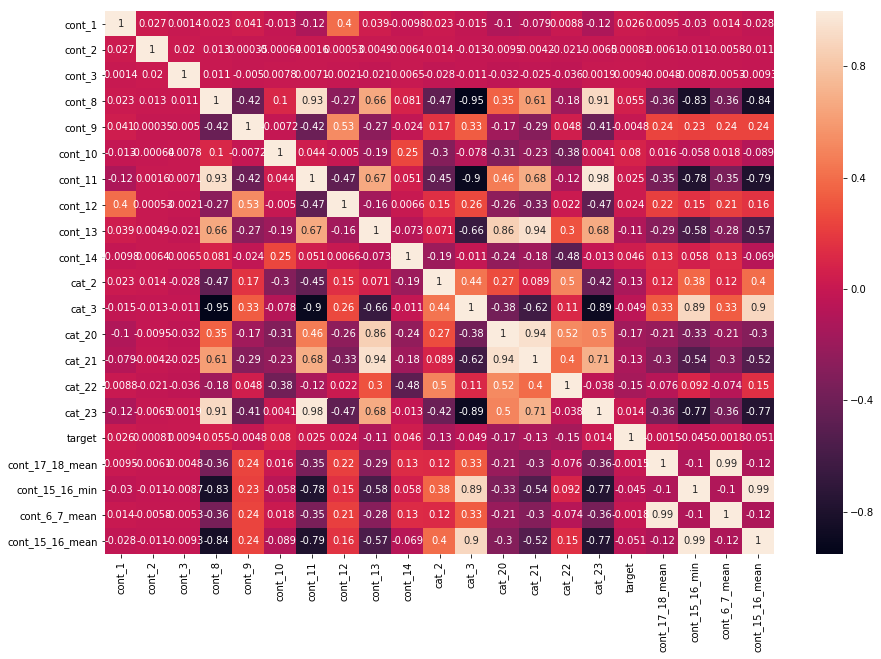

In [236]:
plot_(train)

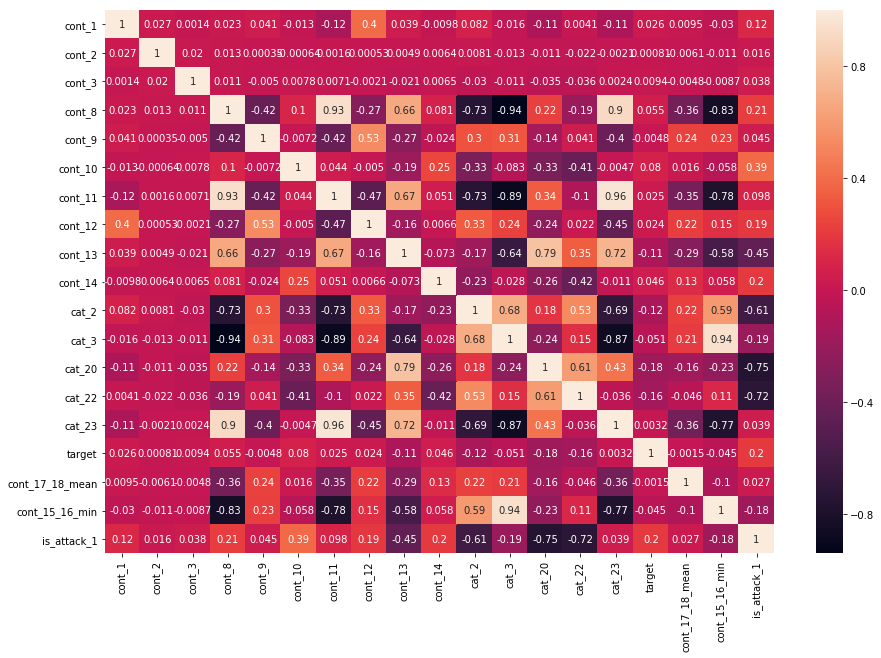

In [67]:
plot_(train)

# MODEL XGB

In [237]:
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [238]:
X_train, X_valid, y_train, y_valid = train_test_split(train[get_features(train)], target, train_size = 0.8, stratify = target, random_state = 1996)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [239]:
## function for multi-accuracy
from sklearn.metrics import accuracy_score
def multAcc(pred, dtrain):
    label = dtrain.get_label()
    acc = accuracy_score(label, pred)
    return 'maccuracy', acc

In [240]:
# default parameters
params_ = {}
params_['objective'] = 'multi:softmax'
params_['eta'] = 0.2
params_['silent'] = True
params_['max_depth'] = 10
params_['subsample'] = 0.9
params_['colsample_bytree'] = 0.9
params_['nthread']=-1
params_['num_class']=3
params_['booster']='gbtree'
params_['lambda']=.8
params_['min_child_weight']=20
'''
{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,
            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,
            'eval_metric': 'rmse', 'objective': 'reg:linear'}
'''

"\n{'min_child_weight': 50, 'eta': 0.3, 'colsample_bytree': 0.3, 'max_depth': 10,\n            'subsample': 0.8, 'lambda': 1., 'nthread': -1, 'booster' : 'gbtree', 'silent': 1,\n            'eval_metric': 'rmse', 'objective': 'reg:linear'}\n"

In [241]:
# default parameters
params = {}
params['objective'] = 'multi:softmax'
params['eta'] = 0.02
params['silent'] = True
params['max_depth'] = 6
params['subsample'] = 0.9
params['colsample_bytree'] = 0.9
params['nthread']=-1
params['num_class']=3

In [242]:
# dtrain = xgb.DMatrix(data=train[get_features(train)], label=target)
dtrain = xgb.DMatrix(data=X_train[get_features(train)], label=y_train)
dvalid = xgb.DMatrix(data=X_valid[get_features(train)], label=y_valid)
dtest = xgb.DMatrix(data=test[get_features(test)])
watchlist = [(dtrain, 'train'),(dvalid, 'eval')]

In [243]:
free(),train.shape,test.shape

(55917, (169307, 22), (91166, 21))

In [244]:
# .02 325 iteration 780993 after step 1  , .02 375 iteration 781053 after step 2, .02 347 iteration 781082 after step 3
# .02 392 iteration 781082 after step 4 ,after step 5 .02 362-400iter 781082
clf1_2 = xgb.train(params, dtrain, 20000, watchlist, maximize=True, verbose_eval=50, early_stopping_rounds=260, feval=multAcc)


[0]	train-maccuracy:0.778021	eval-maccuracy:0.777774
Multiple eval metrics have been passed: 'eval-maccuracy' will be used for early stopping.

Will train until eval-maccuracy hasn't improved in 260 rounds.
[50]	train-maccuracy:0.780036	eval-maccuracy:0.779842
[100]	train-maccuracy:0.780686	eval-maccuracy:0.780432
[150]	train-maccuracy:0.78124	eval-maccuracy:0.780934
[200]	train-maccuracy:0.781424	eval-maccuracy:0.780875
[250]	train-maccuracy:0.781579	eval-maccuracy:0.780905
[300]	train-maccuracy:0.781683	eval-maccuracy:0.780934
[350]	train-maccuracy:0.78183	eval-maccuracy:0.780964
[400]	train-maccuracy:0.781956	eval-maccuracy:0.780905
[450]	train-maccuracy:0.782067	eval-maccuracy:0.780934
[500]	train-maccuracy:0.782199	eval-maccuracy:0.780905
[550]	train-maccuracy:0.782303	eval-maccuracy:0.780905
Stopping. Best iteration:
[317]	train-maccuracy:0.781742	eval-maccuracy:0.781053



In [499]:
# clf1_1 = xgb.train(params, dtrain, 400)

In [500]:
# clf1_1 = pickle.load(open('781112_ohe.sav', 'rb'))

In [795]:
sub=pd.read_csv('test_data.csv')

In [796]:
pred = clf1_2.predict(dtest)

In [797]:
len(pred),len(sub['connection_id'])

(91166, 91166)

In [798]:
## make submission
sub['target'] = pred
sub['target'] = sub['target'].astype(int)
sub[['connection_id','target']].to_csv('XGB_20_NOV_78.1082_.02eta_392iter.csv', index=False)

In [799]:
import pickle
pickle.dump(clf1_1,open('XGB_20_NOV_78.1082_.02eta_392iter.sav','wb'))

In [784]:
free()

49

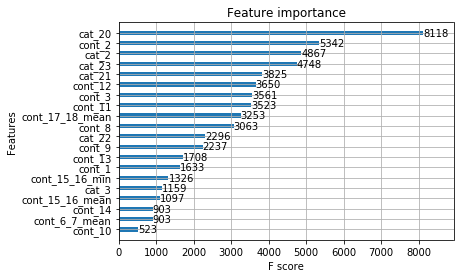

In [276]:
xgb.plot_importance(clf1_2, ax=None, height=0.4, xlim=None,
                    ylim=None, title='Feature importance',
                    xlabel='F score', ylabel='Features',
                    importance_type='weight',
                    grid=True)
plt.figure(figsize=(14,10))
plt.show()

### Model 2 - Decision Tree

In [75]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [79]:
## set up model
clf2 = DecisionTreeClassifier(max_depth=9, min_samples_split=5)

In [80]:
clf2.fit(X_train[get_features(train)],y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [81]:
print(accuracy_score(y_valid,clf2.predict(X_valid[get_features(train)])))

0.780343748154


In [666]:
## train model
clf2.fit(train[feature_names], target)

NameError: name 'feature_names' is not defined

In [44]:
## make prediction
pred2 = clf2.predict(test[feature_names])

In [47]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred2
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub2.csv', index=False)

### Model 3 - Logistic Regression

In [814]:
from sklearn.linear_model import LogisticRegression

In [815]:
clf3 = LogisticRegression(C=0.01,n_jobs=-1,solver='sag')

In [816]:
clf3.fit(X_train[get_features(train)],y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=None, solver='sag', tol=0.0001,
          verbose=0, warm_start=False)

In [1]:
# clf3.fit(train[get_features(train)], target)

In [817]:
print(accuracy_score(y_valid,clf3.predict(X_valid[get_features(train)])))

0.751520878861


In [49]:
print(accuracy_score(y_valid,clf3.predict(X_valid[feature_names])))

0.731705156222


In [52]:
pred3 = clf3.predict(test[feature_names])

In [53]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub3_Logistic.csv', index=False)

# MODEL 4 - NaiveBayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB

In [83]:
from sklearn.preprocessing import StandardScaler

In [686]:
x_tr=StandardScaler().fit_transform(X_train[feature_names])
x_ts=StandardScaler().fit_transform(X_valid[feature_names])

NameError: name 'feature_names' is not defined

In [84]:
clf4=GaussianNB()

In [87]:
clf4=MultinomialNB()

In [88]:
clf4.fit(X_train[get_features(train)],y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [89]:
print(accuracy_score(y_valid,clf4.predict(X_valid[get_features(train)])))

0.732413915303


In [122]:
clf4.fit(train[feature_names], target)

GaussianNB(priors=None)

In [124]:
pred3 = clf4.predict(test[feature_names])

In [125]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub5_NaiveBayes.csv', index=False)

# Model 5 : -    RandomForest

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
clf=RandomForestClassifier(n_estimators=500, criterion='entropy', max_depth=None, min_samples_split=2,
                           min_samples_leaf=50, min_weight_fraction_leaf=0.0, max_features=None, 
                           max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
                           bootstrap=True, oob_score=True, n_jobs=-1, random_state=1996, verbose=10,
                           warm_start=False, class_weight=None)

In [95]:
clf.fit(X_train[get_features(train)],y_train)

building tree 1 of 500
building tree 2 of 500building tree 4 of 500building tree 3 of 500


building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s


building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.6s


building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s


building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.5s


building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.8s


building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.7s


building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500


[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   12.3s


building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500


[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:   14.3s


building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500


[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:   17.2s


building tree 82 of 500
building tree 83 of 500
building tree 84 of 500
building tree 85 of 500
building tree 86 of 500
building tree 87 of 500
building tree 88 of 500
building tree 89 of 500
building tree 90 of 500
building tree 91 of 500
building tree 92 of 500
building tree 93 of 500
building tree 94 of 500


[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   20.3s


building tree 95 of 500
building tree 96 of 500
building tree 97 of 500
building tree 98 of 500
building tree 99 of 500
building tree 100 of 500
building tree 101 of 500
building tree 102 of 500
building tree 103 of 500
building tree 104 of 500
building tree 105 of 500
building tree 106 of 500
building tree 107 of 500
building tree 108 of 500
building tree 109 of 500
building tree 110 of 500


[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed:   24.1s


building tree 111 of 500
building tree 112 of 500
building tree 113 of 500
building tree 114 of 500
building tree 115 of 500
building tree 116 of 500
building tree 117 of 500
building tree 118 of 500
building tree 119 of 500
building tree 120 of 500
building tree 121 of 500
building tree 122 of 500
building tree 123 of 500


[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   27.7s


building tree 124 of 500
building tree 125 of 500
building tree 126 of 500
building tree 127 of 500
building tree 128 of 500
building tree 129 of 500
building tree 130 of 500
building tree 131 of 500
building tree 132 of 500
building tree 133 of 500
building tree 134 of 500
building tree 135 of 500
building tree 136 of 500
building tree 137 of 500
building tree 138 of 500
building tree 139 of 500
building tree 140 of 500
building tree 141 of 500


[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:   32.1s


building tree 142 of 500
building tree 143 of 500
building tree 144 of 500
building tree 145 of 500
building tree 146 of 500
building tree 147 of 500
building tree 148 of 500
building tree 149 of 500
building tree 150 of 500
building tree 151 of 500
building tree 152 of 500
building tree 153 of 500
building tree 154 of 500
building tree 155 of 500
building tree 156 of 500
building tree 157 of 500
building tree 158 of 500


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   36.2s


building tree 159 of 500
building tree 160 of 500
building tree 161 of 500
building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500


[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed:   40.8s


building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500


[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   45.5s


building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500
building tree 202 of 500
building tree 203 of 500
building tree 204 of 500
building tree 205 of 500
building tree 206 of 500
building tree 207 of 500
building tree 208 of 500
building tree 209 of 500
building tree 210 of 500
building tree 211 of 500
building tree 212 of 500
building tree 213 of 500
building tree 214 of 500
building tree 215 of 500
building tree 216 of 500
building tree 217 of 500
building tree 218 of 500
building tree 219 of 500


[Parallel(n_jobs=-1)]: Done 213 tasks      | elapsed:   50.4s


building tree 220 of 500
building tree 221 of 500
building tree 222 of 500
building tree 223 of 500
building tree 224 of 500
building tree 225 of 500
building tree 226 of 500
building tree 227 of 500
building tree 228 of 500
building tree 229 of 500
building tree 230 of 500
building tree 231 of 500
building tree 232 of 500
building tree 233 of 500
building tree 234 of 500
building tree 235 of 500
building tree 236 of 500
building tree 237 of 500
building tree 238 of 500
building tree 239 of 500


[Parallel(n_jobs=-1)]: Done 234 tasks      | elapsed:   54.8s


building tree 240 of 500
building tree 241 of 500
building tree 242 of 500
building tree 243 of 500
building tree 244 of 500
building tree 245 of 500
building tree 246 of 500
building tree 247 of 500
building tree 248 of 500
building tree 249 of 500
building tree 250 of 500
building tree 251 of 500
building tree 252 of 500
building tree 253 of 500
building tree 254 of 500
building tree 255 of 500
building tree 256 of 500
building tree 257 of 500
building tree 258 of 500
building tree 259 of 500
building tree 260 of 500
building tree 261 of 500


[Parallel(n_jobs=-1)]: Done 257 tasks      | elapsed:   59.6s


building tree 262 of 500
building tree 263 of 500
building tree 264 of 500
building tree 265 of 500
building tree 266 of 500
building tree 267 of 500
building tree 268 of 500
building tree 269 of 500
building tree 270 of 500
building tree 271 of 500
building tree 272 of 500
building tree 273 of 500
building tree 274 of 500
building tree 275 of 500
building tree 276 of 500
building tree 277 of 500
building tree 278 of 500
building tree 279 of 500
building tree 280 of 500
building tree 281 of 500
building tree 282 of 500
building tree 283 of 500
building tree 284 of 500
building tree 285 of 500
building tree 286 of 500


[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  1.1min


building tree 287 of 500
building tree 288 of 500
building tree 289 of 500
building tree 290 of 500
building tree 291 of 500
building tree 292 of 500
building tree 293 of 500
building tree 294 of 500
building tree 295 of 500
building tree 296 of 500
building tree 297 of 500
building tree 298 of 500
building tree 299 of 500
building tree 300 of 500
building tree 301 of 500
building tree 302 of 500
building tree 303 of 500
building tree 304 of 500
building tree 305 of 500
building tree 306 of 500
building tree 307 of 500
building tree 308 of 500
building tree 309 of 500
building tree 310 of 500


[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:  1.2min


building tree 311 of 500
building tree 312 of 500
building tree 313 of 500
building tree 314 of 500
building tree 315 of 500
building tree 316 of 500
building tree 317 of 500
building tree 318 of 500
building tree 319 of 500
building tree 320 of 500
building tree 321 of 500
building tree 322 of 500
building tree 323 of 500
building tree 324 of 500
building tree 325 of 500
building tree 326 of 500
building tree 327 of 500
building tree 328 of 500
building tree 329 of 500
building tree 330 of 500
building tree 331 of 500
building tree 332 of 500
building tree 333 of 500
building tree 334 of 500


[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:  1.3min


building tree 335 of 500
building tree 336 of 500
building tree 337 of 500
building tree 338 of 500
building tree 339 of 500
building tree 340 of 500
building tree 341 of 500
building tree 342 of 500
building tree 343 of 500
building tree 344 of 500
building tree 345 of 500
building tree 346 of 500
building tree 347 of 500
building tree 348 of 500
building tree 349 of 500
building tree 350 of 500
building tree 351 of 500
building tree 352 of 500
building tree 353 of 500
building tree 354 of 500
building tree 355 of 500
building tree 356 of 500
building tree 357 of 500
building tree 358 of 500
building tree 359 of 500
building tree 360 of 500
building tree 361 of 500
building tree 362 of 500


[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.4min


building tree 363 of 500
building tree 364 of 500
building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500


[Parallel(n_jobs=-1)]: Done 384 tasks      | elapsed:  1.5min


building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500
building tree 405 of 500
building tree 406 of 500
building tree 407 of 500
building tree 408 of 500
building tree 409 of 500
building tree 410 of 500
building tree 411 of 500
building tree 412 of 500
building tree 413 of 500
building tree 414 of 500
building tree 415 of 500
building tree 416 of 500
building tree 417 of 500


[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  1.6min


building tree 418 of 500
building tree 419 of 500
building tree 420 of 500
building tree 421 of 500
building tree 422 of 500
building tree 423 of 500
building tree 424 of 500
building tree 425 of 500
building tree 426 of 500
building tree 427 of 500
building tree 428 of 500
building tree 429 of 500
building tree 430 of 500
building tree 431 of 500
building tree 432 of 500
building tree 433 of 500
building tree 434 of 500
building tree 435 of 500
building tree 436 of 500
building tree 437 of 500
building tree 438 of 500
building tree 439 of 500
building tree 440 of 500
building tree 441 of 500
building tree 442 of 500
building tree 443 of 500
building tree 444 of 500
building tree 445 of 500
building tree 446 of 500


[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.7min


building tree 447 of 500
building tree 448 of 500
building tree 449 of 500
building tree 450 of 500
building tree 451 of 500
building tree 452 of 500
building tree 453 of 500
building tree 454 of 500
building tree 455 of 500
building tree 456 of 500
building tree 457 of 500
building tree 458 of 500
building tree 459 of 500
building tree 460 of 500
building tree 461 of 500
building tree 462 of 500
building tree 463 of 500
building tree 464 of 500
building tree 465 of 500
building tree 466 of 500
building tree 467 of 500
building tree 468 of 500
building tree 469 of 500
building tree 470 of 500
building tree 471 of 500
building tree 472 of 500
building tree 473 of 500
building tree 474 of 500
building tree 475 of 500
building tree 476 of 500


[Parallel(n_jobs=-1)]: Done 473 tasks      | elapsed:  1.9min


building tree 477 of 500
building tree 478 of 500
building tree 479 of 500
building tree 480 of 500
building tree 481 of 500
building tree 482 of 500
building tree 483 of 500
building tree 484 of 500
building tree 485 of 500
building tree 486 of 500
building tree 487 of 500
building tree 488 of 500
building tree 489 of 500
building tree 490 of 500
building tree 491 of 500
building tree 492 of 500
building tree 493 of 500
building tree 494 of 500
building tree 495 of 500
building tree 496 of 500
building tree 497 of 500
building tree 498 of 500
building tree 499 of 500
building tree 500 of 500


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.9min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=10,
            warm_start=False)

In [96]:
print(accuracy_score(y_valid,clf.predict(X_valid[get_features(train)])))

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Do

0.779280609533


[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed:    1.3s
[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:    1.4s finished


In [347]:
clf.fit(train[feature_names], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=-1,
            oob_score=True, random_state=1996, verbose=0, warm_start=False)

In [348]:
pred3 = clf.predict(test[feature_names])

In [349]:
## make submission
sub = pd.read_csv('sample_submission.csv')
sub['target'] = pred3
sub['target'] = sub['target'].astype(int)
sub.to_csv('sub4_Random_f_2.csv', index=False)